In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold

sns.set()

C:\Users\Nitin\AppData\Local\Temp\ipykernel_23196\2056786400.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
data = pd.read_csv('datasets\heart.csv')
data.head()
print('\t\t Data Info:')
print(data.info())
print('\n\n\t\t Data Head:')
print(data.head())
print('\n\n\t\t Data Describe:')
print(data.describe())
print('\n\nData Shape: ',data.shape)
print('\n\n\t\t Null Values')
print(data.isna().sum())

		 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


		 Data Head:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       

<Axes: xlabel='target', ylabel='Count'>

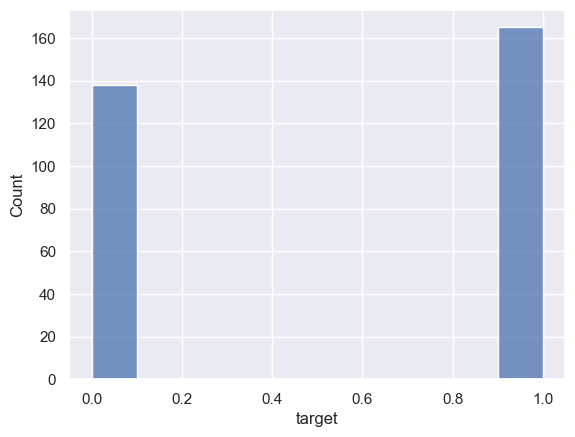

In [12]:
var = 'target'
sns.histplot(data, x='target')

(0.0, 80.0)

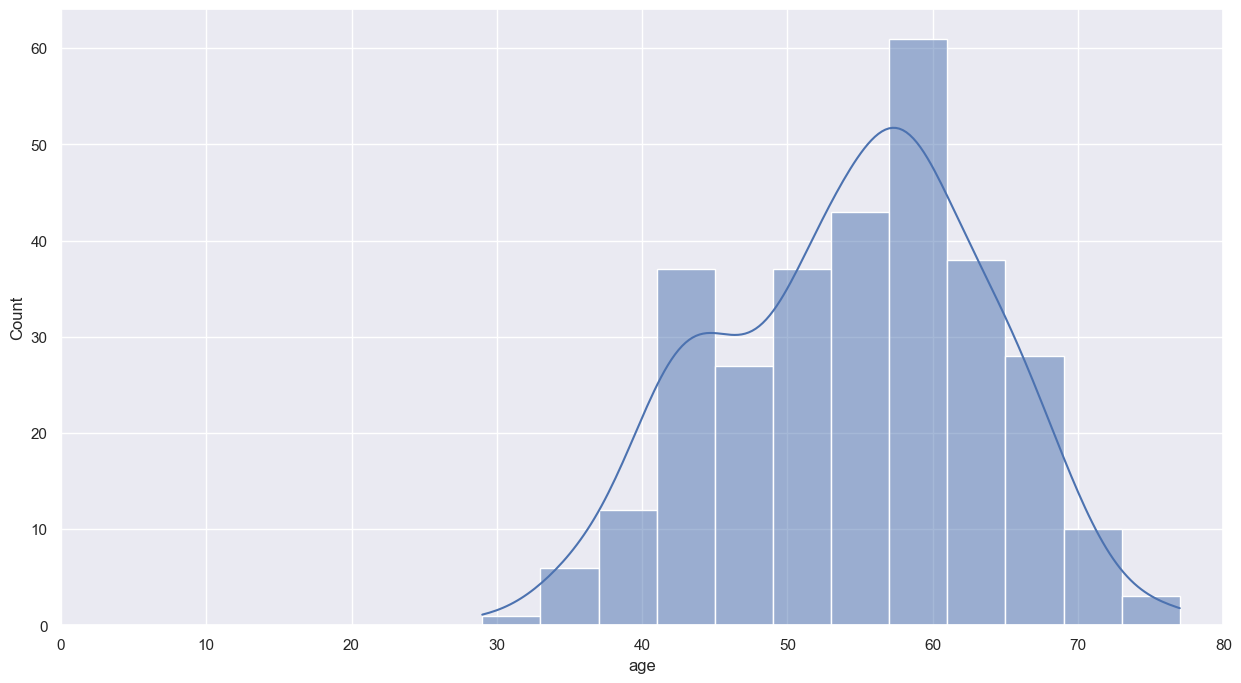

In [22]:
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(data['age'], kde=True)
plt.xlim([0,80])

<Axes: xlabel='chol', ylabel='age'>

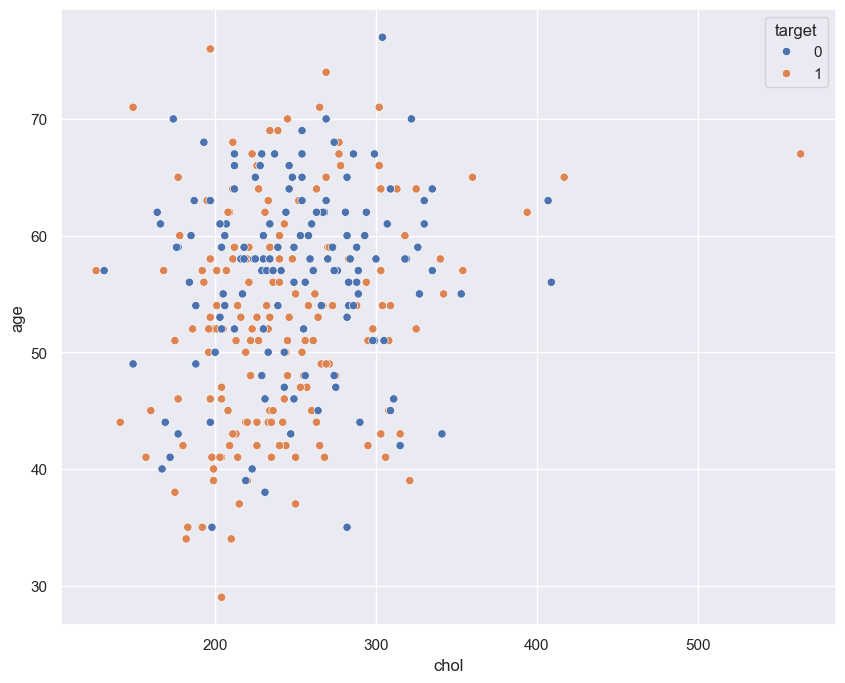

In [36]:
var = 'trestbps'
f, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(data=data, x='chol', y='age', hue='target')

<Axes: >

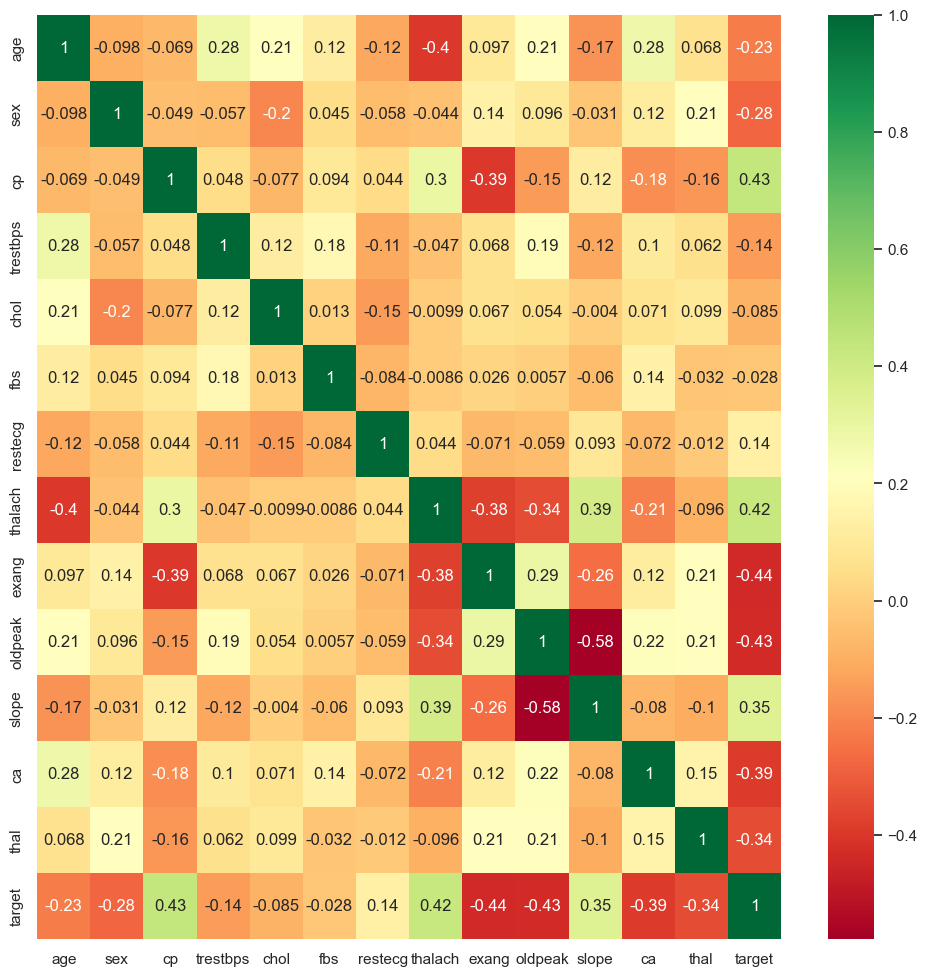

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

In [42]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print("\n\n\t\tIndependent features of Dataset: ")
print(X.head())
print("\n\n\t\tDependent features of Dataset: ")
print(y.head())




		Independent features of Dataset: 
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


		Dependent features of Dataset: 
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 25)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [48]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.7704918032786885

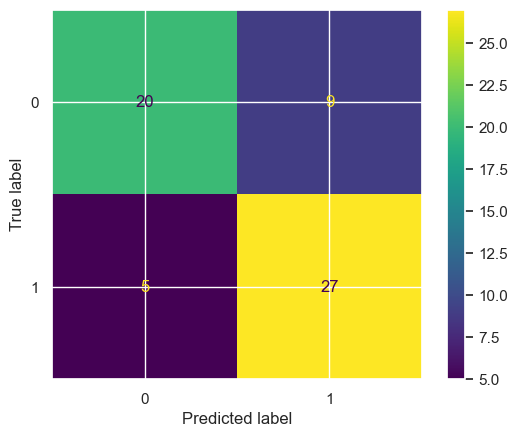

In [59]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.show()


In [63]:
precision = metrics.precision_score(y_test, y_pred)
print("Precision: {}".format(precision))

recall = metrics.recall_score(y_test, y_pred)
print("Recall: {}".format(recall))

Precision: 0.75
Recall: 0.84375


In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        29
           1       0.75      0.84      0.79        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



[0.         0.31034483 1.        ]


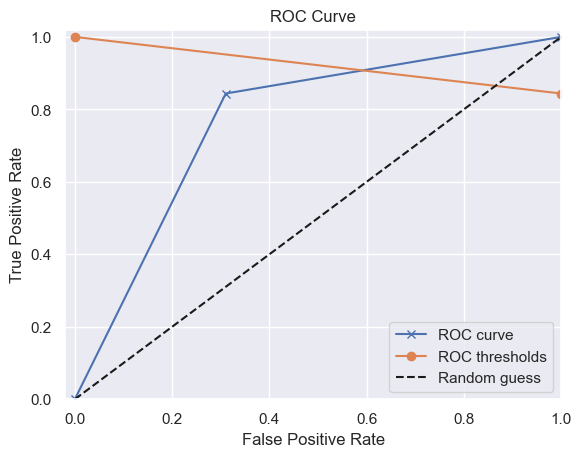

In [79]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, drop_intermediate=False)

plt.plot(fpr, tpr, label='ROC curve', marker='x')
plt.plot(thresholds, tpr, label='ROC thresholds', marker='o')
plt.plot([0,1], [0,1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [80]:
metrics.roc_auc_score(y_test, y_pred)

0.7667025862068966